In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from dataproject import CleanData


# Exploring the Impact of Legal Drinking Age Changes

## Introduction

The project aims to construct a dataset for applying a staggered Difference-in-Differences (DID) model. The goal of the DID analysis is to assess whether changes in the legal drinking age affect employment rates. To achieve this, we exploit the heterogeneity in drinking age regulations across the United States from 1986 to 1988.

We focus on states that experienced a clear increase in the drinking age from 19 to 21. Specifically, Alabama, Florida, and Minnesota raised the drinking age from 19 to 21 in 1986, Idaho did so in 1987, and Minnesota followed in 1988. For comparison, states such as California, Indiana, Kentucky, Wyoming, Missouri, Nevada, New Mexico, North Dakota, Oregon, Pennsylvania, and Utah maintained a constant drinking age of 21 during this period.

Our project’s specific goal is to generate a dataset that meets the requirements of the DID function in Stata, which necessitates a long-format dataset. Additionally, we aim to derive initial insights regarding potential implications for employment rates and to assess the validity of the parallel trend assumption, a fundamental requirement for the DID approach.

The project is structured as follows: First, the different dataframes are imported, cleaned, and transformed to the long format in the "Read and Clean Data" section. Secondly, in the "Merging the Datasets" section, we merge these different dataframes into one comprehensive dataframe. Lastly, in the "Interpretation" section, the variables of interest are constructed, and summary statistics as well as scatter plots are generated to validate the correlation and parallel trend assumption.

# Read and clean data

As the selected Data contains states that are later not from relevance, a list is created that contains the states of relevance. Further, the data needs to be brought in the long data format. The necessery steps are peremormed in the py file.

In [2]:
# Define the relevant states and input CSV files
relevant_states = ["Alabama", "Arkansas", "Florida", "California", "Idaho", "Indiana", "Minnesota", "Kentucky", "Wyoming", "Missouri", "Nevada", "New Mexico", "North Dakota", "Oregon", "Pennsylvania", "Utah"]
input_csv_di = "spi0404-5.csv"
input_csv_pop = "spi0404-3.csv"
input_csv_emp = "CAINC4__ALL_AREAS_1969_2022.csv"

### Disposable income per capita data

In [3]:
# Process the disposable income data using the CleanData class
drop_list_di = ["Per capita disposable personal income 2/", "State Code", "Region Code"]
di_long = CleanData.process_data(input_csv_di, relevant_states, prefix="di", drop_list=drop_list_di)

In [4]:
di_long

,,di
AreaName,year,
Alabama,1969,2412.0
Arkansas,1969,2320.0
California,1969,3958.0
Florida,1969,3215.0
Idaho,1969,2887.0
...,...,...
North Dakota,2003,26902.0
Oregon,2003,26102.0
Pennsylvania,2003,28557.0


### Population data

In [5]:
# Process the population data using the CleanData class
drop_list_pop = ["Population 1/", "State Code", "Region Code"]
pop_long = CleanData.process_data(input_csv_pop, relevant_states, prefix="pop", drop_list=drop_list_pop)

In [6]:
pop_long

,,pop
AreaName,year,
Alabama,1969,3440000.0
Arkansas,1969,1913000.0
California,1969,19711000.0
Florida,1969,6641000.0
Idaho,1969,707000.0
...,...,...
North Dakota,2003,633837.0
Oregon,2003,3559596.0
Pennsylvania,2003,12365455.0


### Employment and Social contribution of the goverment data

The employment data is cleaned using the `process_employment_data` function because its format differs from previous dataframes. Previously, the dataframes were in the classic wide format with a single dependent variable (i.e. disposable income or population). However, this dataframe contains two variables of interest: employment and government contribution. Therefore, the transformation requires the use of pivot tables (see py file).

In [7]:
dtype = {col: 'str' for col in range(2, 62)} #specify dtype to avoid mixed type warning
emp_dataframe = pd.read_csv("CAINC4__ALL_AREAS_1969_2022.csv" , encoding='latin1', dtype=dtype) #Different encoding mechanism needed as this csv data contains some "" in the relevant cloumns, the utf8 encoder appears to be not able to handle this
emp_dataframe.head(5)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"""00000""",United States,,CAINC4,10,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,"""00000""",United States,,CAINC4,11,...,Nonfarm personal income 1/,Thousands of dollars,773954000,838026000,...,13939981000,14674150000,15379910000,15816068000,16584389000,17450632000,18277857000,19532094000,21287027000,21709709000
2,"""00000""",United States,,CAINC4,12,...,Farm income 2/,Thousands of dollars,17275000,17499000,...,123302000,104010000,87203000,68673000,74573000,63770000,65744000,77891000,105785000,110539000
3,"""00000""",United States,,CAINC4,20,...,Population (persons) 3/,Number of persons,201298000,203798722,...,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
4,"""00000""",United States,,CAINC4,30,...,Per capita personal income (dollars) 4/,Dollars,3931,4198,...,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470


In [8]:
# Process the employment data using the CleanData class
emp_pivot = CleanData.process_employment_data(input_csv_emp, relevant_states)

In [9]:
emp_pivot

,Year,GeoName,emp,soc_gov
0,1969,Alabama,1411234,550477
1,1969,Arkansas,799917,278076
2,1969,California,9032738,4827173
3,1969,Florida,2856879,1132486
4,1969,Idaho,315337,126332
...,...,...,...,...
859,2022,North Dakota,587819,4581134
860,2022,Oregon,2658285,24898034
861,2022,Pennsylvania,7978320,65626704
862,2022,Utah,2367996,16568957


## Merging the Data sets

The first merge is the data sets `di_long` and `pop_long`.

In [10]:
# Python checks if we're doing the merge we're expecting to do and finds no error
di_pop = pd.merge(di_long,pop_long,on=['AreaName','year'],how='outer',validate='1:1')


In [11]:
#Renaming di as it is the disposable income per capita
di_pop.rename(columns = {"di" : "di_cap"}, inplace = True)


In [12]:
di_pop.head(5)

,,di_cap,pop
AreaName,year,,
Alabama,1969,2412.0,3440000.0
Arkansas,1969,2320.0,1913000.0
California,1969,3958.0,19711000.0
Florida,1969,3215.0,6641000.0
Idaho,1969,2887.0,707000.0


Next is the merging of `di_pop` and `emp_pivot`

In [14]:
#As the variables are named diffrently we rename them in emp_pivot
emp_pivot.rename(columns = {"GeoName" : "AreaName", "Year" : "year"}, inplace = True)
#As the di_pop has Multilevel in the data frame we reset this to the same
di_pop.reset_index(level=['AreaName', 'year'], inplace=True)

The first merge attempt did not work as the year variable are of diffrent data types. Therefore, the data types are unified.

In [15]:
print(di_pop['year'].dtype)
print(emp_pivot['year'].dtype)


int64
object


In [16]:
di_pop['year'] = di_pop['year'].astype(int)
emp_pivot['year'] = emp_pivot['year'].astype(int)


In [17]:
di_pop_emp = pd.merge(di_pop, emp_pivot, on= ["AreaName", "year"], how = "outer", validate = "1:1")

In [18]:
di_pop_emp.head(5)

,AreaName,year,di_cap,pop,emp,soc_gov
0,Alabama,1969,2412.0,3440000.0,1411234,550477
1,Arkansas,1969,2320.0,1913000.0,799917,278076
2,California,1969,3958.0,19711000.0,9032738,4827173
3,Florida,1969,3215.0,6641000.0,2856879,1132486
4,Idaho,1969,2887.0,707000.0,315337,126332


The merging process is now completed.

## Interpretation

As the data for employment and the social goverment contribution is in absolute terms, the first step is to create everything in per capita terms.

In [19]:
di_pop_emp['emp'] = di_pop_emp['emp'].astype(float) #As here the types did also not match
di_pop_emp['emp_cap'] = di_pop_emp['emp'] / di_pop_emp['pop']

In [20]:
 #As here the types did also not match
di_pop_emp['soc_gov'] = di_pop_emp['soc_gov'].astype(float) 
di_pop_emp['soc_gov_cap'] = di_pop_emp['soc_gov'] / di_pop_emp['pop']

Creating a group id depending on when or if the countries had an increase in the legal drinking age. Group 1 reperesnt countries with an increase of the drinking age in 1986, group 2 in 1987 and group 3 in 1988. Group 4 countries had no change in drinking age.

In [21]:
def assign_group_id(state):
    if state in ['Alabama', 'Florida', 'Minnesota']:
        return 1
    elif state == 'Idaho':
        return 2
    elif state == 'Wyoming':
        return 3
    else:
        return 4

di_pop_emp['group_id'] = di_pop_emp['AreaName'].apply(assign_group_id)

For the countries undergoing treatment, a `time_to_event` variable is created to normalize the time relative to the event. This variable is essential for a staggered difference-in-difference (DID) framework, which aims to estimate the impact of a change in the legal drinking age.

In [22]:
def calculate_time_to_event(row):
    if row['group_id'] == 1:
        return row['year'] - 1986
    elif row['group_id'] == 2:
        return row['year'] - 1987
    elif row['group_id'] == 3:
        return row['year'] - 1988
    else:
        return None

di_pop_emp['time_to_event'] = di_pop_emp.apply(calculate_time_to_event, axis=1)

In [23]:
di_pop_emp.head(10)

,AreaName,year,di_cap,pop,emp,soc_gov,emp_cap,soc_gov_cap,group_id,time_to_event
0,Alabama,1969,2412.0,3440000.0,1411234.0,550477.0,0.410242,0.160022,1,-17.0
1,Arkansas,1969,2320.0,1913000.0,799917.0,278076.0,0.418148,0.145361,4,NaN
2,California,1969,3958.0,19711000.0,9032738.0,4827173.0,0.458259,0.244897,4,NaN
3,Florida,1969,3215.0,6641000.0,2856879.0,1132486.0,0.430188,0.170529,1,-17.0
4,Idaho,1969,2887.0,707000.0,315337.0,126332.0,0.446021,0.178687,2,-18.0
5,Indiana,1969,3186.0,5143000.0,2326793.0,1096673.0,0.452419,0.213236,4,NaN
6,Kentucky,1969,2585.0,3198000.0,1331869.0,509229.0,0.416469,0.159234,4,NaN
7,Minnesota,1969,3270.0,3758000.0,1690875.0,780755.0,0.449940,0.207758,1,-17.0
8,Missouri,1969,3085.0,4640000.0,2215957.0,954468.0,0.477577,0.205704,4,NaN
9,Nevada,1969,3830.0,480000.0,243701.0,131902.0,0.507710,0.274796,4,NaN


### Deepdive in the Data

First, a summary statistic is created to understand the economic situation of the different states. The maximum values (highlighted in yellow) and the minimum values (highlighted in red) of each economic variable are colored. This helps identify potential outliers in the variables by checking for significant gaps to the second lowest or highest number.

In [24]:
summary_stats = di_pop_emp.groupby('AreaName').agg({
    'emp_cap': 'median',
    'di_cap': 'median',
    'soc_gov_cap': 'median'
}).reset_index()

def highlight_extremes(s):
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: yellow' if v else 'background-color: red' if m else '' for v, m in zip(is_max, is_min)]

styled_summary_stats = summary_stats.style.apply(highlight_extremes, subset=['emp_cap', 'di_cap', 'soc_gov_cap']) # Applies the function to the columns of the DataFrame
styled_summary_stats


,AreaName,emp_cap,di_cap,soc_gov_cap
0,Alabama,0.465549,10889.000000,0.995209
1,Arkansas,0.476115,10593.000000,0.918000
2,California,0.534436,15548.000000,1.427487
3,Florida,0.502444,13740.000000,1.086877
4,Idaho,0.502593,10827.000000,0.963958
5,Indiana,0.505204,12243.000000,1.110268
6,Kentucky,0.470000,10775.000000,0.936273
7,Minnesota,0.574880,14047.000000,1.355767
8,Missouri,0.557587,12937.000000,1.170336
9,Nevada,0.593197,14346.000000,1.480872


The summary table is not indicating the necessearily that outliers are to be expected. Howver, this needs to be validated in scatter plots.

We created scatter plots to evaluate the data's suitability for implementing a Difference-in-Differences (DID) approach. These scatter plots help us identify whether there is parallel movement prior to the treatment, which is a key assumption in the DID framework. Additionally, the graphs help indicate if there are any outliers. We begin by visualizing the yearly employment rate for each of the three treatment groups (affected by the change in drinking age) and the control group.

In [25]:
# create short vaiables for each group
grp1 = di_pop_emp[di_pop_emp.group_id == 1]
grp2 = di_pop_emp[di_pop_emp.group_id == 2]
grp3 = di_pop_emp[di_pop_emp.group_id == 3]
grp4 = di_pop_emp[di_pop_emp.group_id == 4]

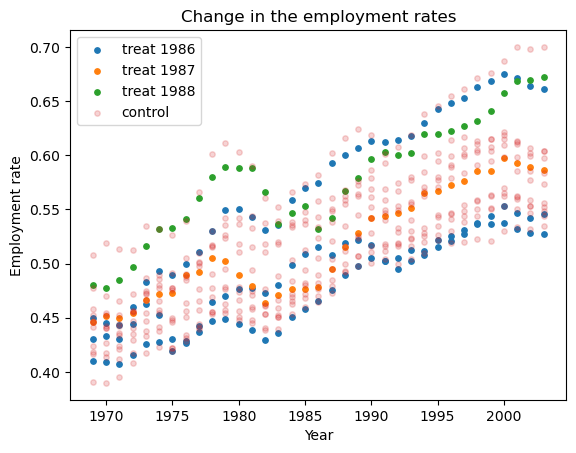

In [26]:
# variable for the size of the scatter dots to be able to easily change them afterwards
marker_size = 15


plt.scatter(grp1.year, grp1.emp_cap, label = 'treat 1986', s = marker_size)

plt.scatter(grp2.year, grp2.emp_cap, label = 'treat 1987', s = marker_size)

plt.scatter(grp3.year, grp3.emp_cap, label = 'treat 1988', s = marker_size)

plt.scatter(grp4.year, grp4.emp_cap, label = 'control', s = marker_size, alpha = 0.2)

plt.xlabel('Year')
plt.ylabel('Employment rate')
plt.title('Change in the employment rates')
plt.legend()

plt.show()

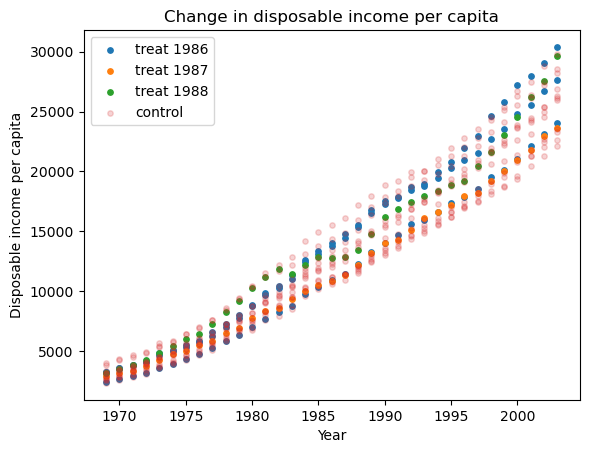

In [27]:
# variable for the size of the scatter dots to be able to easily change them afterwards
marker_size = 15


plt.scatter(grp1.year, grp1.di_cap, label = 'treat 1986', s = marker_size)

plt.scatter(grp2.year, grp2.di_cap, label = 'treat 1987', s = marker_size)

plt.scatter(grp3.year, grp3.di_cap, label = 'treat 1988', s = marker_size)

plt.scatter(grp4.year, grp4.di_cap, label = 'control', s = marker_size, alpha = 0.2)

plt.xlabel('Year')
plt.ylabel('Disposable income per capita')
plt.title('Change in disposable income per capita')
plt.legend()

plt.show()

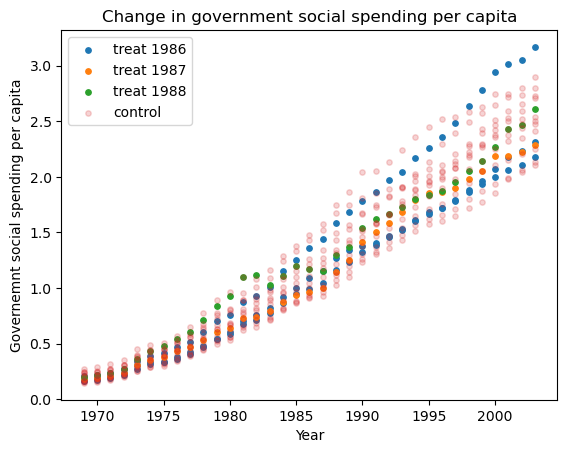

In [28]:
# variable for the size of the scatter dots to be able to easily change them afterwards
marker_size = 15


plt.scatter(grp1.year, grp1.soc_gov_cap, label = 'treat 1986', s = marker_size)

plt.scatter(grp2.year, grp2.soc_gov_cap, label = 'treat 1987', s = marker_size)

plt.scatter(grp3.year, grp3.soc_gov_cap, label = 'treat 1988', s = marker_size)

plt.scatter(grp4.year, grp4.soc_gov_cap, label = 'control', s = marker_size, alpha = 0.2)

plt.xlabel('Year')
plt.ylabel('Governemnt social spending per capita')
plt.title('Change in government social spending per capita')
plt.legend()

plt.show()

The parallel movement of the different countries prior to 1986 provides  evidence that the parallel trend assumption for a DID is met. However, the parallel movement of countries after 1988 hampers the expectation of detecting a potential effect of the change in legal drinking age on the employment rate. The graphs are also indicating no outliers.

Secondly, an interactive graph is constructed to illustrate the behavior of the treatment groups concerning the event. Consequently, the employment rate was plotted against the `time_to_event` variable.

In [29]:
def plot_scatter(group_id):
    data = di_pop_emp[di_pop_emp['group_id'] == group_id]
    plt.scatter(data['time_to_event'], data['emp_cap'])
    plt.xlabel('Time to Event')
    plt.ylabel('Employment rate')
    plt.title(f'Scatter Plot for Group {group_id} to evaluate movement after event')
    plt.plot([0, 0], [0.4, 0.65], label = 'event', color = "red")
    plt.show()

In [30]:
interact(plot_scatter, group_id=[1, 2, 3]);

interactive(children=(Dropdown(description='group_id', options=(1, 2, 3), value=1), Output()), _dom_classes=('…

Notably, for groups one and three, the increase in employment post-implementation seems attributed to an overarching trend, rather than the regulatory change. Group two stands out as the only group potentially experiencing a higher employment due to the regulation change, as there is a side movement prior to the event. This reuslt futher hampers the expectation to find a significant effect.

Finally, we plot the correlation between the employment rate and the control variables used in the regression: disposable income per capita and social government contribution per capita. We expect a positive relationship: with a higher disposable income per capita or goverment contribution the employment rate should increase.

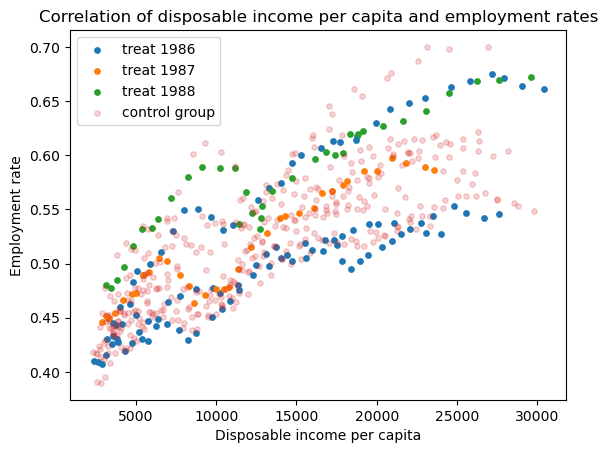

In [31]:
plt.scatter(grp1.di_cap, grp1.emp_cap, label = 'treat 1986', s = marker_size)

plt.scatter(grp2.di_cap, grp2.emp_cap, label = 'treat 1987', s = marker_size)

plt.scatter(grp3.di_cap, grp3.emp_cap, label = 'treat 1988', s = marker_size)

plt.scatter(grp4.di_cap, grp4.emp_cap, label = 'control group', s = marker_size, alpha = 0.2)

plt.xlabel('Disposable income per capita')
plt.ylabel('Employment rate')
plt.title('Correlation of disposable income per capita and employment rates')
plt.legend()

plt.show()


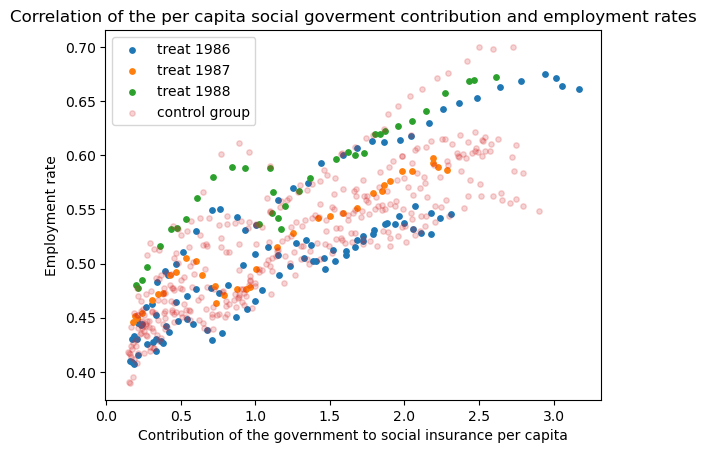

In [32]:
plt.scatter(grp1.soc_gov_cap, grp1.emp_cap, label = 'treat 1986', s = marker_size)

plt.scatter(grp2.soc_gov_cap, grp2.emp_cap, label = 'treat 1987', s = marker_size)

plt.scatter(grp3.soc_gov_cap, grp3.emp_cap, label = 'treat 1988', s = marker_size)

plt.scatter(grp4.soc_gov_cap, grp4.emp_cap, label = 'control group', s = marker_size, alpha = 0.2)

plt.xlabel('Contribution of the government to social insurance per capita')
plt.ylabel('Employment rate')
plt.title('Correlation of the per capita social goverment contribution and employment rates')
plt.legend()

plt.show()


As predicted by economic theory, there is a positive correlation in both cases.

## Conclusion

This data project involved cleaning, transforming, and merging various dataframes to prepare them for application in a DID framework. Additionally, summary statistics and scatter plots were constructed to determine if the necessary parallel trend assumption holds, identify outliers, and assess if the data correlates as suggested by economic theory. Our findings indicate that the parallel trend assumption is met in this data. The correlation between the different variables of interest aligns with common beliefs in economic literature and does not appear to be driven by outliers. However, the graphs also suggest that we might not find an effect of a change in the legal drinking age on the employment rate when applying the DID framework. Nevertheless, the data is adequately prepared for the application of the DID framework.